In [2]:
import pandas as pd


import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

In [60]:
path = '/home/bhatti/dataset/VCHAMPS/immunization_train.csv'
immunization = pd.read_csv(path).iloc[:,1:]
immunization

,Internalpatientid,Age at immunization,Immunization date,Immunization,Dose quantity,Dose unit,Administered elsewhere,Cvx code,Series doses,State
0,100000,63.565815,2019-10-03 07:20:00.0,"PNEUMOCOCCAL, UNSPECIFIED FORMULATION",NaN,NaN,NaN,109.0,Not specified (no value),Ohio
1,100000,63.565815,2019-10-03 07:20:00.0,PNEUMOCOCCAL POLYSACCHARIDE PPV23,NaN,NaN,NaN,33.0,Not specified (no value),Ohio
2,100001,84.407099,2010-05-23 19:04:26.0,"INFLUENZA, UNSPECIFIED FORMULATION",NaN,NaN,NaN,88.0,Not specified (no value),North Carolina
3,100008,70.572815,2019-10-06 08:44:11.0,"INFLUENZA, INJECTABLE, QUADRIVALENT, PRESERVAT...",NaN,NaN,NaN,150.0,Not specified (no value),North Carolina
4,100008,71.570887,2020-10-05 03:49:18.0,"INFLUENZA, INJECTABLE, QUADRIVALENT, PRESERVAT...",NaN,NaN,NaN,150.0,Complete,North Carolina
...,...,...,...,...,...,...,...,...,...,...
1847640,99988,77.191685,2003-12-20 13:27:45.0,"INFLUENZA, UNSPECIFIED FORMULATION",NaN,NaN,NaN,88.0,Not specified (no value),Florida
1847641,99993,58.944520,2008-01-24 05:19:38.0,"PNEUMOCOCCAL, UNSPECIFIED FORMULATION",NaN,NaN,NaN,109.0,Not specified (no value),Kentucky
1847642,99999,87.997774,2004-11-27 04:28:15.0,"INFLUENZA, UNSPECIFIED FORMULATION",NaN,NaN,NaN,88.0,Not specified (no value),California
1847643,99999,89.989158,2006-11-25 00:53:27.0,"INFLUENZA, UNSPECIFIED FORMULATION",NaN,NaN,NaN,88.0,Not specified (no value),California


CVX code: This column contains the Center for Disease Control (CDC) code used for this vaccine  - this is the CVX code

In [4]:
immunization['Immunization'].unique()

array(['PNEUMOCOCCAL, UNSPECIFIED FORMULATION',
       'PNEUMOCOCCAL POLYSACCHARIDE PPV23',
       'INFLUENZA, UNSPECIFIED FORMULATION',
       'INFLUENZA, INJECTABLE, QUADRIVALENT, PRESERVATIVE FREE',
       'COVID-19 (MODERNA), MRNA, LNP-S, PF, 100 MCG/0.5ML DOSE OR 50 MCG/0.25ML DOSE',
       'INFLUENZA, WHOLE', 'INFLUENZA (HISTORICAL)',
       'FLU,3 YRS (HISTORICAL)', 'TD(ADULT) UNSPECIFIED FORMULATION',
       'Influenza Vaccination (Refused) (HISTORICAL)',
       'INFLUENZA, SEASONAL, INJECTABLE, PRESERVATIVE FREE',
       'INFLUENZA VIRUS VACCINE, 3YR AND OLDER (HISTORICAL)',
       'COVID-19 (PFIZER), MRNA, LNP-S, PF, 30 MCG/0.3 ML DOSE',
       'ZOSTER RECOMBINANT', 'ZOSTER LIVE', 'TDAP',
       'PNEUMOCOCCAL CONJUGATE PCV 13', 'INFLUENZA, SEASONAL, INJECTABLE',
       'Influenza (HISTORICAL)', 'V7 PNEUMOCOCCAL (HISTORICAL)',
       'INFLUENZA, TRIVALENT, ADJUVANTED',
       'FLU VACCINE NO PRESERV 3 & >  (HISTORICAL)',
       'NOVEL INFLUENZA-H1N1-09, ALL FORMULATIONS',
    

In [61]:
len(immunization['Immunization'].unique())

533

In [72]:
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'other' if 'unlisted' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'other' if 'nan' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'other' if 'error' in str(x) else str(x))

In [73]:
immunization = immunization.drop_duplicates(subset = ['Internalpatientid','Immunization'],keep = 'first')
immunization

,Internalpatientid,Age at immunization,Immunization date,Immunization,Dose quantity,Dose unit,Administered elsewhere,Cvx code,Series doses,State,num_immunization
0,100000,63.565815,2019-10-03 07:20:00.0,"PNEUMOCOCCAL, UNSPECIFIED FORMULATION",NaN,NaN,NaN,109.0,Not specified (no value),Ohio,NaN
1,100000,63.565815,2019-10-03 07:20:00.0,PNEUMOCOCCAL POLYSACCHARIDE PPV23,NaN,NaN,NaN,33.0,Not specified (no value),Ohio,15.0
2,100001,84.407099,2010-05-23 19:04:26.0,"INFLUENZA, UNSPECIFIED FORMULATION",NaN,NaN,NaN,88.0,Not specified (no value),North Carolina,14.0
3,100008,70.572815,2019-10-06 08:44:11.0,"INFLUENZA, INJECTABLE, QUADRIVALENT, PRESERVAT...",NaN,NaN,NaN,150.0,Not specified (no value),North Carolina,1.0
6,100008,73.987220,2023-03-07 07:53:49.0,"COVID-19 (MODERNA), MRNA, LNP-S, PF, 100 MCG/0...",NaN,NaN,NaN,207.0,2,North Carolina,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1847624,9997,81.125667,2018-09-22 10:21:07.0,"INFLUENZA, SEASONAL, INJECTABLE, PRESERVATIVE ...",NaN,NaN,NaN,140.0,Not specified (no value),Oregon,NaN
1847633,9998,58.467717,2007-04-15 22:48:54.0,"NOVEL INFLUENZA-H1N1-09, ALL FORMULATIONS",NaN,NaN,NaN,128.0,Not specified (no value),Nebraska,NaN
1847634,99981,67.824030,2010-03-03 16:23:14.0,"PNEUMOCOCCAL, UNSPECIFIED FORMULATION",NaN,NaN,NaN,109.0,Not specified (no value),Illinois,NaN
1847638,99987,55.932171,2001-05-21 05:00:04.0,TETANUS REFUSED (HISTORICAL),NaN,NaN,NaN,NaN,Not specified (no value),Maryland,NaN


In [76]:
immunization['num_immunization'] = immunization['Immunization'].groupby(immunization['Internalpatientid']).transform('count')
immunization = immunization.sort_values(by = 'Internalpatientid')
immunization

,Internalpatientid,Age at immunization,Immunization date,Immunization,Dose quantity,Dose unit,Administered elsewhere,Cvx code,Series doses,State,num_immunization
44067,1,75.473628,2019-09-29 14:39:51.0,PNEUMOCOCCAL CONJUGATE PCV 13,NaN,NaN,NaN,133.0,Complete,Indiana,15
811,1,70.586882,2014-11-08 12:07:45.0,INFLUENZA (HISTORICAL),NaN,NaN,His work,88.0,Not specified (no value),Indiana,15
810,1,70.586882,2014-11-08 12:07:45.0,H1N1 (HISTORICAL),NaN,NaN,His work,128.0,Not specified (no value),Indiana,15
28048,1,79.560156,2023-11-01 05:41:33.0,"INFLUENZA VACCINE, QUADRIVALENT, ADJUVANTED",NaN,NaN,NaN,205.0,Not specified (no value),Indiana,15
809,1,62.296668,2006-07-23 10:22:13.0,PNEUMOCOCCAL POLYSACCHARIDE PPV23,NaN,NaN,NaN,33.0,Complete,Indiana,15
...,...,...,...,...,...,...,...,...,...,...,...
609178,169063,74.508808,2002-02-10 23:15:39.0,"FLU,3 YRS (HISTORICAL)",NaN,NaN,NaN,88.0,Not specified (no value),New York,1
683433,169064,80.311795,2007-04-09 23:03:46.0,"PNEUMOCOCCAL, UNSPECIFIED FORMULATION",NaN,NaN,NaN,109.0,Not specified (no value),West Virginia,4
609179,169064,78.369057,2005-04-29 21:21:52.0,"INFLUENZA, UNSPECIFIED FORMULATION",NaN,NaN,NaN,88.0,Not specified (no value),Wyoming,4
609180,169064,80.393994,2007-05-10 00:07:02.0,INFLUENZA VACCINE (HISTORICAL),NaN,NaN,NaN,88.0,Not specified (no value),Pennsylvania,4


In [80]:
# The information in Immunization has been included in num_immunization
# Drop duplicates
immunization2 = immunization.copy()
immunization2 = immunization2.drop_duplicates(subset = ['Internalpatientid'],keep = 'first').reset_index(drop = True)
immunization2

,Internalpatientid,Age at immunization,Immunization date,Immunization,Dose quantity,Dose unit,Administered elsewhere,Cvx code,Series doses,State,num_immunization
0,1,75.473628,2019-09-29 14:39:51.0,PNEUMOCOCCAL CONJUGATE PCV 13,NaN,NaN,NaN,133.0,Complete,Indiana,15
1,2,60.788293,2015-07-07 02:54:32.0,"MENINGOCOCCAL ACWY, UNSPECIFIED FORMULATION",NaN,NaN,NaN,108.0,Not specified (no value),Texas,14
2,3,82.011665,2005-07-04 06:19:47.0,"INFLUENZA, UNSPECIFIED FORMULATION",NaN,NaN,NaN,88.0,Not specified (no value),Florida,1
3,4,81.253287,2012-03-18 01:50:15.0,"PNEUMOCOCCAL, UNSPECIFIED FORMULATION",NaN,NaN,NaN,109.0,Complete,Puerto Rico,6
4,5,73.625543,2001-12-18 03:15:53.0,"INFLUENZA, UNSPECIFIED FORMULATION",NaN,NaN,NaN,88.0,Not specified (no value),Florida,2
...,...,...,...,...,...,...,...,...,...,...,...
125154,169057,73.557774,2012-11-14 08:47:31.0,"NOVEL INFLUENZA-H1N1-09, ALL FORMULATIONS",NaN,NaN,NaN,128.0,Not specified (no value),California,15
125155,169061,76.986391,2019-02-18 12:37:16.0,"INFLUENZA, UNSPECIFIED FORMULATION",NaN,NaN,NaN,88.0,Not specified (no value),Georgia,10
125156,169062,71.818192,2003-06-03 13:10:39.0,PNEUMOCOCCAL (HISTORICAL),NaN,NaN,NaN,109.0,Not specified (no value),Florida,1
125157,169063,74.508808,2002-02-10 23:15:39.0,"FLU,3 YRS (HISTORICAL)",NaN,NaN,NaN,88.0,Not specified (no value),New York,1


In [85]:
immunization2['Dose quantity'].isna().sum()

124844

In [86]:
immunization2['Dose unit'].isna().sum()

124844

## Combine inpatient with immunization

In [81]:
path = '/home/hassan/lily/MLA/FDA/inpatient_admission_withtarget.csv'
inpatient = pd.read_csv(path).iloc[:,1:]

In [83]:
immunization_subset = immunization2[['Internalpatientid', 'num_immunization']]

In [88]:
immunization_subset.describe()

,Internalpatientid,num_immunization
count,125159.000000,125159.000000
mean,84411.447822,6.295624
std,48750.877619,4.027229
min,1.000000,1.000000
25%,42244.500000,3.000000
50%,84402.000000,5.000000
75%,126592.500000,9.000000
max,169064.000000,27.000000


In [84]:
inpatient_immun = inpatient.merge(immunization_subset, how = 'inner', on = 'Internalpatientid')
inpatient_immun 

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Cardiovascular,Readmission,num_immunization
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,0,1,NaN,1.0,Utah,0,0,7
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,0,1,0.0,0.0,North Carolina,0,1,6
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,Regular,0,1,NaN,0.0,North Carolina,0,1,6
3,100001,84.898357,2010-11-19 08:23:30.0,2010-11-26 11:03:10.0,NHCU,NHCU,LONG TERM PSYCHIATRY(>45 DAYS),NH SHORT STAY REHABILITATION,Encounter for other specified aftercare,Presence of orthopedic joint implants ; Presen...,Regular,0,1,NaN,0.0,North Carolina,0,1,6
4,100001,86.568969,2012-07-21 23:00:00.0,2012-07-22 19:18:48.0,MEDICINE,MEDICINE,PM&R TRANSITIONAL REHAB,CARDIAC INTENSIVE CARE UNIT,"Atrioventricular block, second degree","Obesity, unspecified",Regular,0,1,NaN,0.0,North Carolina,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510617,98207,83.030278,2005-11-04 13:35:59.0,2005-11-08 10:40:46.0,MEDICINE,MEDICINE,DOMICILIARY,GENERAL(ACUTE MEDICINE),"Heart failure, unspecified","Acute kidney failure, unspecified",Regular,0,1,NaN,0.0,Illinois,1,0,5
510618,98603,60.826232,2013-01-05 23:42:36.0,2013-01-07 21:48:12.0,MEDICINE,MEDICINE,PTSD RESIDENTIAL REHAB PROG,GENERAL(ACUTE MEDICINE),Type 2 diabetes mellitus without complications,Essential (primary) hypertension,Regular,0,1,NaN,0.0,Georgia,0,0,4
510619,98916,65.079672,2011-03-07 14:52:48.0,2011-03-08 10:58:45.0,MEDICINE,MEDICINE,OPHTHALMOLOGY,GENERAL(ACUTE MEDICINE),Type 2 diabetes mellitus with neurological com...,Opioid dependence,Regular,0,1,NaN,1.0,Michigan,0,0,8
510620,99820,79.326955,2003-05-01 00:02:52.0,2003-05-19 09:17:02.0,MEDICINE,MEDICINE,GENERAL(ACUTE MEDICINE),Not specified (no value),Pneumonia due to Pseudomonas,Alcohol dependence,Regular,0,1,NaN,NaN,Nebraska,0,0,4


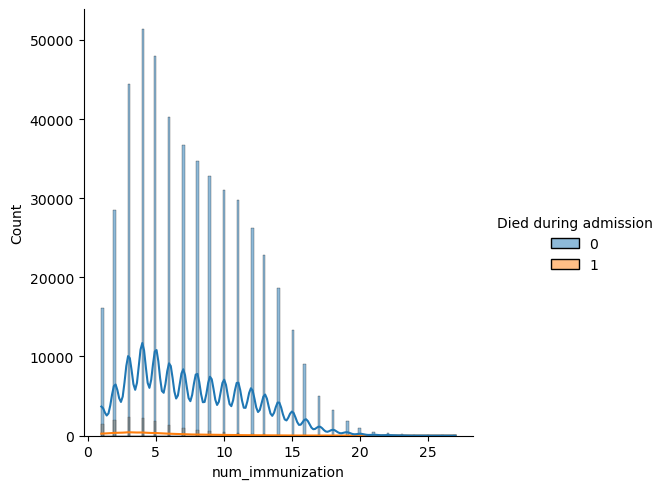

In [87]:
sns.displot(data=inpatient_immun, x='num_immunization', hue = 'Died during admission', kde=True)

<Axes: xlabel='num_immunization', ylabel='Died during admission'>

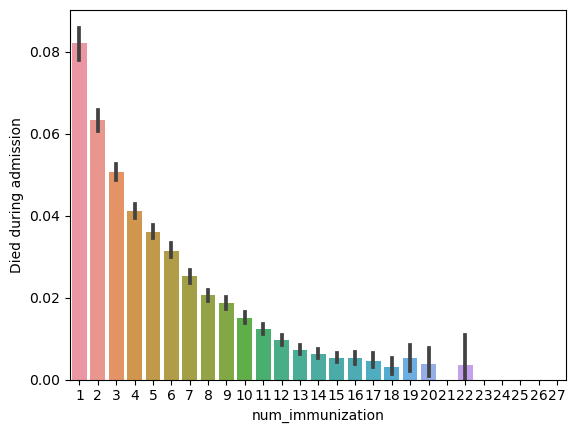

In [90]:
sns.barplot(data=inpatient_immun, x='num_immunization', y = 'Died during admission')

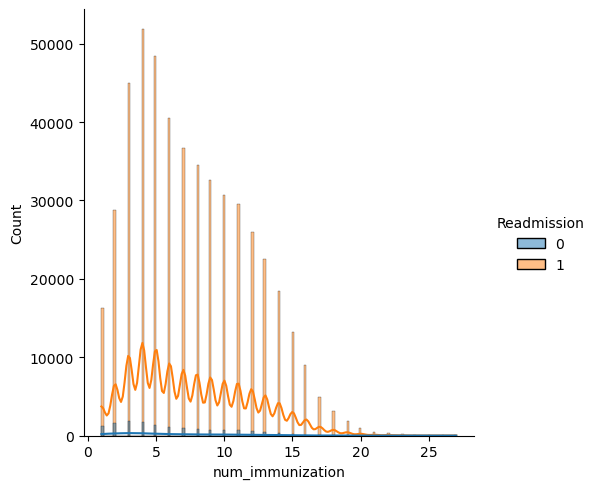

In [97]:
sns.displot(data=inpatient_immun, x='num_immunization', hue = 'Readmission', kde=True)

<Axes: xlabel='num_immunization', ylabel='Readmission'>

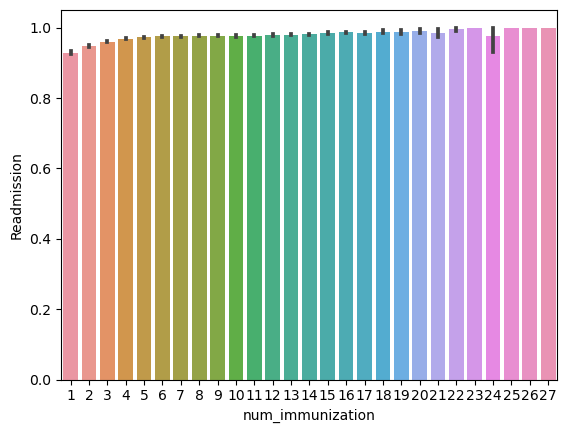

In [94]:
sns.barplot(data=inpatient_immun, x='num_immunization', y = 'Readmission')

/tmp/ipykernel_58097/3194461185.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


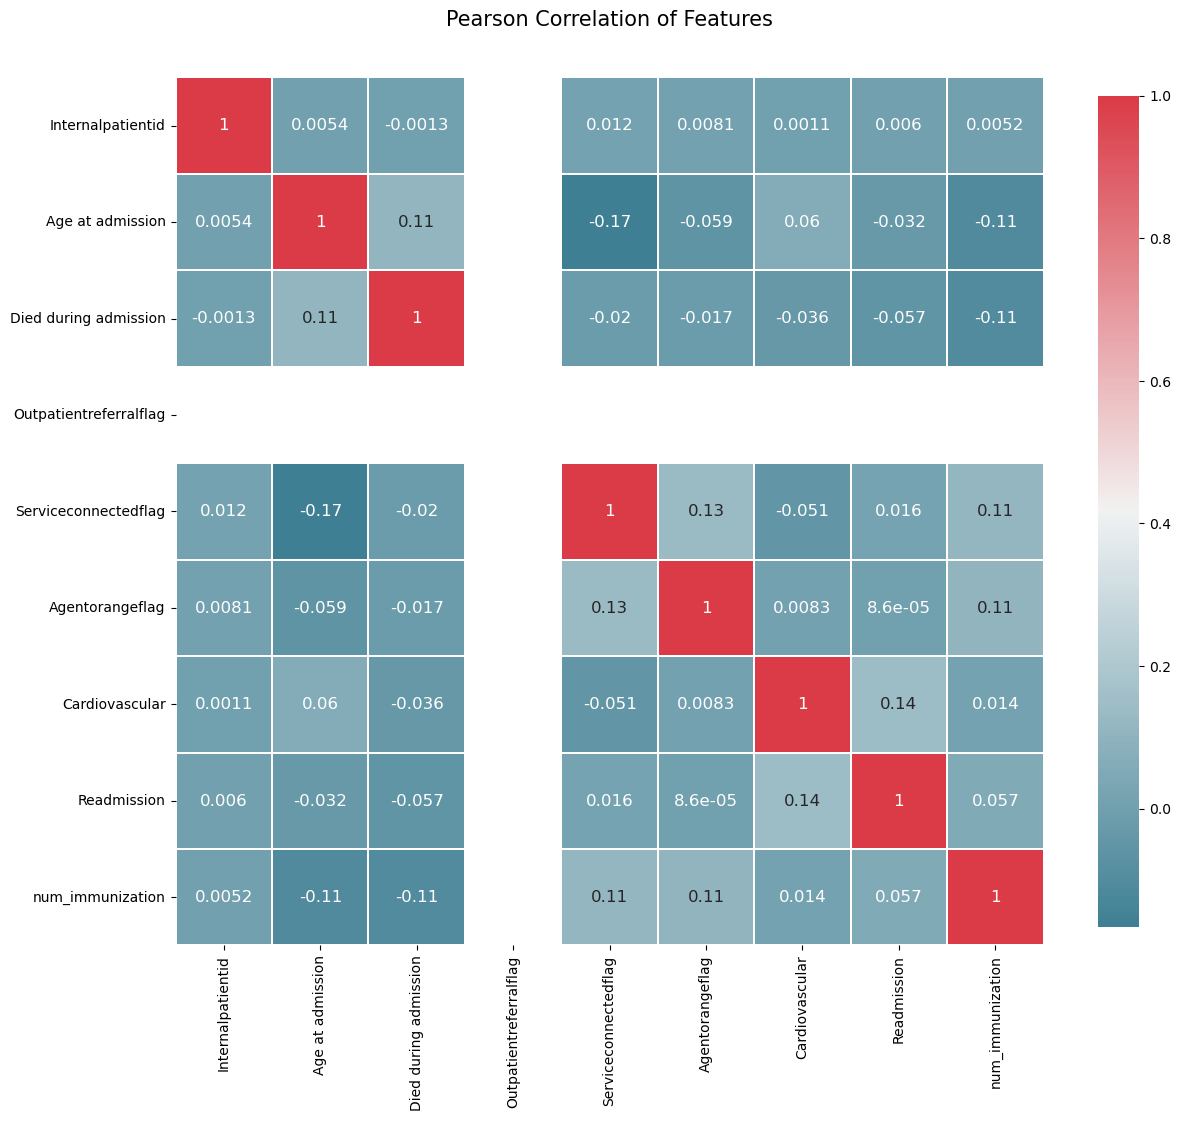

In [93]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

#correlation_heatmap(data[orig_cols+[target, target2]])
correlation_heatmap(inpatient_immun)

Immunizations can basically categorized into Influence vaccine, covid-19 vaccine, pneumococcal, Tetanus / Diptheria Immunization, mumps, Hepatitis vaccine, varicella zoster, RABIES/INTRAMUSCULAR INJECTION, MENINGOCOCCAL

zostavax: a zoster vaccine for people over 60 years old

Measles, Mumps, and Rubella (MMR) 
Children get MMRV instead of MMR

Inactivated poliovirus vaccine (IPV)

Gardasil HPV vaccine

inactivated polio vaccine, IPV 
oral poliovirus vaccine, OPV


They seems not really related to cardiovascular or mortality??

In [ ]:
'''
immunization['Immunization'] = immunization['Immunization'].str.lower()
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'influence' if 'flu' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'influence' if 'hib' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'influence' if 'h1n1' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'pneumococcal' if 'pneum' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'pneumococcal' if 'prevnar' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'pneumococcal' if 'pcv' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 'tet' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 'dtap' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 'dt' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 'td' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 'tdap' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 't-dap' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'tetanus/diptheria' if 'diphtheria' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'hepatitis' if 'hep' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'rabies/intramuscular injection' if 'rabi' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'mmr' if 'mumps' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'mmr' if 'mmr' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'mmr' if 'rubella' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'mmr' if 'mmrv' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'mmr' if 'm/r' in str(x) else str(x))

immunization.Immunization=  immunization.Immunization.apply(lambda x: 'meningococcal' if 'mening' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'zoster' if 'zoster' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'zoster' if 'varicella' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'zoster' if 'zostravax' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'hpv' if 'hpv' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'hpv' if 'garda' in str(x) else str(x)) # gardacil & gardasil

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'covid' if 'covid' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'skin test' if 'ppd' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'skin test' if 'skin' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'fever' if 'yellow' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'fever' if 'typhoid' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'zostavax' if 'zostav' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'zostavax' if 'shingles' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'polio vaccine' if 'polio' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'polio vaccine' if 'opv' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'polio vaccine' if 'ipv' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'encephalitis' if 'japanese' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'encephalitis' if 'encephalitis' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'vitamin' if 'vitamin' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'bcg' if 'bcg' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'adenovirus' if 'adenovirus' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'twinrix' if 'twinrix' in str(x) else str(x))

immunization.Immunization =  immunization.Immunization.apply(lambda x: 'other' if 'unlisted' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'other' if 'nan' in str(x) else str(x))
immunization.Immunization =  immunization.Immunization.apply(lambda x: 'other' if 'error' in str(x) else str(x))
'''